### Source: https://github.com/jakevdp/PythonDataScienceHandbook

Birth data from the Centers for Disease Control (CDC)
Download data to local directory using:

```curl https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv -o data/births.csv --create-dirs```

Or navigate to the above url manually and download
   

In [1]:
import pandas as pd
import numpy as np

In [6]:
# births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births = pd.read_csv('data/births.csv')

In [5]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [7]:
births.shape

(15547, 5)

### We want to group by decade, so create a 'decade' column

In [15]:
births['decade'] = 10 * (births['year'] // 10)
# pd.set_option('display.max_rows', None)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [ ]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

In [25]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum') 

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


Text(0, 0.5, 'total births per decade')

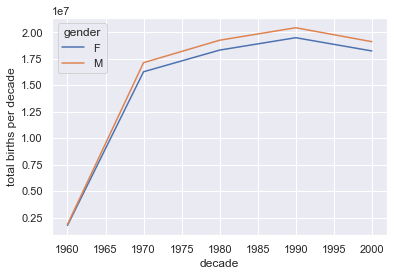

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # use Seaborn styles

births.pivot_table('births', index='decade', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per decade')


Text(0, 0.5, 'total births per year')

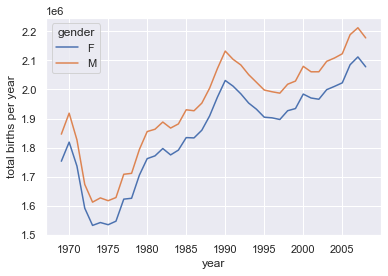

In [24]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

### The above example used pivot tables. Let's take a closer look at pivot tables
https://pandas.pydata.org/docs/user_guide/reshaping.html

In [128]:
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [129]:
births.pivot_table('births', index='decade') # by default it aggregates on mean

,births
decade,
1960,4687.768229
1970,4382.334602
1980,5600.865474
1990,166250.029167
2000,172850.634259


In [130]:
births.pivot_table('births', index='decade', columns='gender')

gender,F,M
decade,,
1960,4566.755208,4808.781250
1970,4267.403569,4497.386393
1980,5460.886072,5740.886635
1990,162328.783333,170171.275000
2000,168789.898148,176911.370370


In [131]:
# change aggregate function from default 'mean' to 'sum'
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


### GroupBy

In [26]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [32]:
# total births by year

births.groupby('year')['births'].mean()

year
1969      4687.768229
1970      4866.927083
1971      4664.329843
1972      4269.588235
1973      4128.772966
1974      4139.204961
1975      4133.100917
1976      4174.081472
1977      4378.658344
1978      4386.727989
1979      4685.133869
1980      4843.348059
1981      4879.885906
1982      4927.081551
1983      4863.579439
1984      4917.761714
1985      5108.635007
1986      5109.639946
1987      5202.204638
1988      5296.066306
1989    168570.541667
1990    173454.875000
1991    171472.583333
1992    169559.500000
1993    166855.125000
1994    164871.875000
1995    162625.500000
1996    162286.416667
1997    161847.041667
1998    164383.000000
1999    165144.375000
2000    169325.958333
2001    167980.458333
2002    167807.333333
2003    170670.500000
2004    171621.125000
2005    172734.125000
2006    178051.041667
2007    180167.000000
2008    177298.166667
Name: births, dtype: float64

In [33]:
# total births by year and gender

births.groupby(['year', 'gender'])['births'].sum()

year  gender
1969  F         1753634
      M         1846572
1970  F         1819164
      M         1918636
1971  F         1736774
                 ...   
2006  M         2188268
2007  F         2111890
      M         2212118
2008  F         2077929
      M         2177227
Name: births, Length: 80, dtype: int64

In [40]:
births[(births['year'] == 2006) & (births['gender'] == 'M')]['births'].sum()

2188268

In [41]:
# average births by year

births.groupby('year')['births'].mean()

year
1969      4687.768229
1970      4866.927083
1971      4664.329843
1972      4269.588235
1973      4128.772966
1974      4139.204961
1975      4133.100917
1976      4174.081472
1977      4378.658344
1978      4386.727989
1979      4685.133869
1980      4843.348059
1981      4879.885906
1982      4927.081551
1983      4863.579439
1984      4917.761714
1985      5108.635007
1986      5109.639946
1987      5202.204638
1988      5296.066306
1989    168570.541667
1990    173454.875000
1991    171472.583333
1992    169559.500000
1993    166855.125000
1994    164871.875000
1995    162625.500000
1996    162286.416667
1997    161847.041667
1998    164383.000000
1999    165144.375000
2000    169325.958333
2001    167980.458333
2002    167807.333333
2003    170670.500000
2004    171621.125000
2005    172734.125000
2006    178051.041667
2007    180167.000000
2008    177298.166667
Name: births, dtype: float64

In [47]:
pd.set_option('display.max_rows', None)

births_1973 = births[(births['year'] == 1973) & (births['births'] > 5000)]
births_1973

,year,month,day,gender,births,decade
3449,1973,7,3.0,M,5143,1970
3477,1973,7,17.0,M,5080,1970
3505,1973,7,31.0,M,5089,1970
3527,1973,8,10.0,M,5014,1970
3535,1973,8,14.0,M,5155,1970
3581,1973,9,5.0,M,5028,1970
3621,1973,9,25.0,M,5211,1970
3623,1973,9,26.0,M,5099,1970
3818,1973,12,28.0,M,5182,1970


In [44]:
births_1973['births'].max()

5211